<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [19]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Task 1: Become familiar with the dataset

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [9]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Task 2: Generate Descriptive Statistics and Visualizations

#### For the "Median value of owner-occupied homes" provide a boxplot

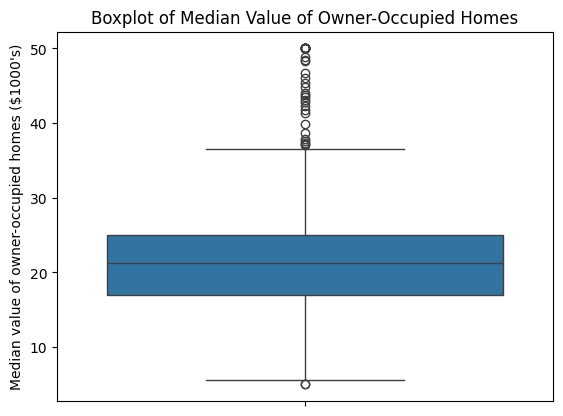

In [37]:
ax = sns.boxplot(y="MEDV", data=boston_df)
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("Median value of owner-occupied homes ($1000's)")
plt.show()

#### Provide a  bar plot for the Charles river variable

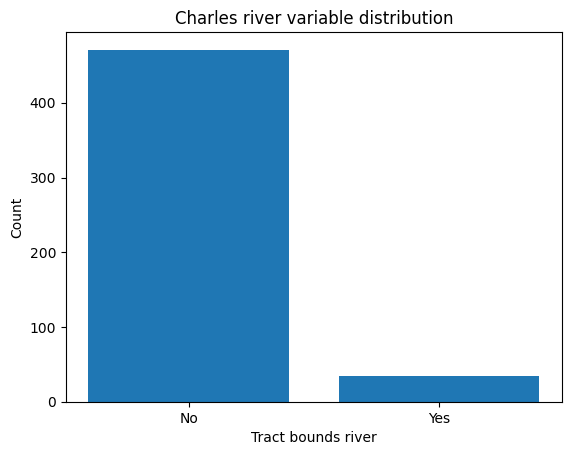

In [36]:
sorted_counts = boston_df.CHAS.value_counts().sort_index()
labels = ['No', 'Yes']  # 0 = No, 1 = Yes
plt.bar(labels, sorted_counts.values)
plt.xlabel("Tract bounds river")
plt.ylabel("Count")
plt.title("Charles river variable distribution")
plt.show()

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

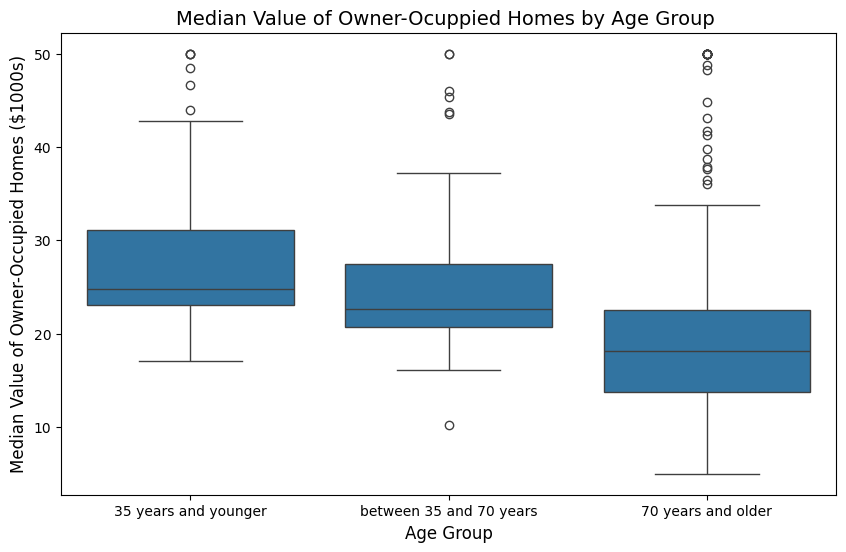

In [50]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

plt.figure(figsize=(10, 6))

ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df, order=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
plt.title("Median Value of Owner-Ocuppied Homes by Age Group ", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Median Value of Owner-Occupied Homes ($1000s)", fontsize=12)
plt.show()


#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

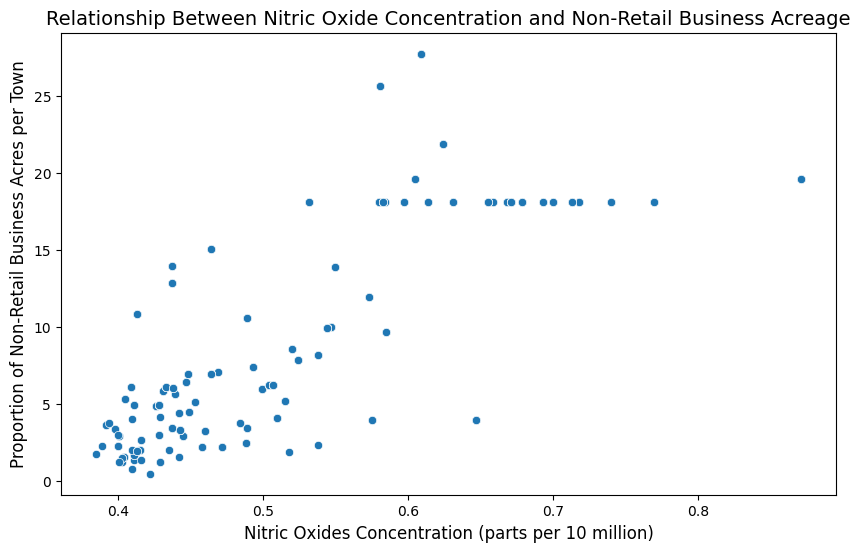

In [70]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title("Relationship Between Nitric Oxide Concentration and Non-Retail Business Acreage", fontsize=14)
plt.xlabel("Nitric Oxides Concentration (parts per 10 million)", fontsize=12)
plt.ylabel("Proportion of Non-Retail Business Acres per Town", fontsize=12)
plt.show()
#It looks like  is a relationship between the two variables, upward sloping type of a relationship. 

#### Create a histogram for the pupil to teacher ratio variable

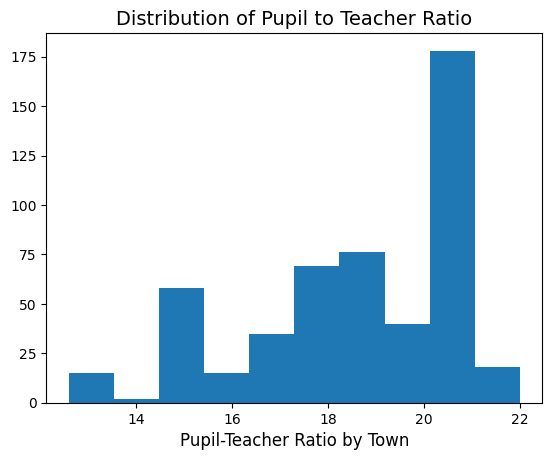

In [56]:
plt.hist(boston_df['PTRATIO'])
plt.title("Distribution of Pupil to Teacher Ratio", fontsize=14)
plt.xlabel("Pupil-Teacher Ratio by Town", fontsize=12)
plt.show()

### Task 3: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [59]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
            boston_df[boston_df['CHAS'] == 1.0]['MEDV'])      
#We reject the null hypothesis (p-value < aplha 0.05), so there is a significant difference in median value between houses bounded and not bounded by the Charles river

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [65]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
                   center='mean')
#We fail to reject the null hypothesis and assume equal variances (pvalue > aplha 0.05).

thrityfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thrityfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
#Since the p-value is less than 0.05, we will reject the null hypothesis and there is significant difference in median price values according to age groups..

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [71]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
#Since the p-value is < 0.05, we reject the null hypothesis and conclude that there exists a relationship between nitric oxide concentrations and proportion of non-retail business acres.

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [73]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()
#p-value < 0.05, so there is evidence of correlation between the variables. For every additional unit of distance, the median home value increases by approximately $1,091.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        14:30:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""